<a href="https://colab.research.google.com/github/pharringtonp19/business-analytics/blob/main/notebooks/regression/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Clone Library**

In [20]:
!git clone https://github.com/pharringtonp19/business-analytics.git

fatal: destination path 'business-analytics' already exists and is not an empty directory.


### **Import Packages**

In [21]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import plotly.graph_objects as go
import numpy as np
import jax.numpy as jnp
import jax
import seaborn as sb

### **Read In Data Set**

In [22]:
df = pd.read_csv('/content/business-analytics/datasets/brookline.csv')
df.head()

,price,stNumber,stName,size,beacon,baseFloor,buildingStyle,elevators,rooms,bedrooms,fullBathrooms,halfBathrooms,garage
0,174000,150,PLEASANT ST,1060,0,4,MID-RISE,1,4,2,1,1,1.0
1,337000,7,LEVERETT ST,831,0,1,DECKER,0,4,2,1,0,0.0
2,850000,24,EUSTON ST,2246,0,1,ROW-END,0,10,6,3,0,0.0
3,516000,417,WASHINGTON ST,1574,0,2,LOW-RISE,0,6,3,2,0,0.0
4,145000,150,PLEASANT ST,669,0,4,MID-RISE,1,3,1,1,0,1.0


### **Fitting the Model**



Fill in the following code to create a Scatterplot of Size and Beacon

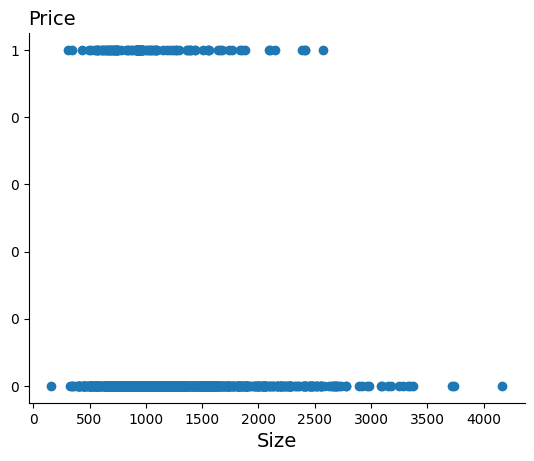

In [23]:
### ADD SCATTER PLOT HERE
plt.scatter(df['size'], df['beacon'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.xlabel('Size', size=14)
plt.title('Price', loc='left', size=14)
plt.show()

Use the following code to fit the logistic model:

$$p_{\text{Price}}(1) = \text{Sigmoid}(\beta_0 + \beta_1 \text{Size}_i)$$

$$x \longmapsto \text{Sigmoid}(x) = \frac{1}{1 + e^{-x}}$$

In [24]:
#reg = smf.ols('[Insert Dependent/Outcome Variable] ~ [Insert Independent Variable/Control/Feature]', data = df).fit()
reg = smf.logit('beacon ~ size', data = df).fit()

### PRINT FITTED PARAMETERS
print(f"Fitted Parameters: {reg.params.values}")

### PRESENT RESULTS
print(summary_col([reg],
                  stars=True,
                  float_format='%0.2f'))

Optimization terminated successfully.
         Current function value: 0.333248
         Iterations 7
Fitted Parameters: [-1.21646947e+00 -7.88977745e-04]

           beacon 
------------------
Intercept -1.22***
          (0.26)  
size      -0.00***
          (0.00)  
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


### **Model Predictions**



Complete the following function and call it on the estimated parameter values

In [25]:
def model(params, x):
  pass


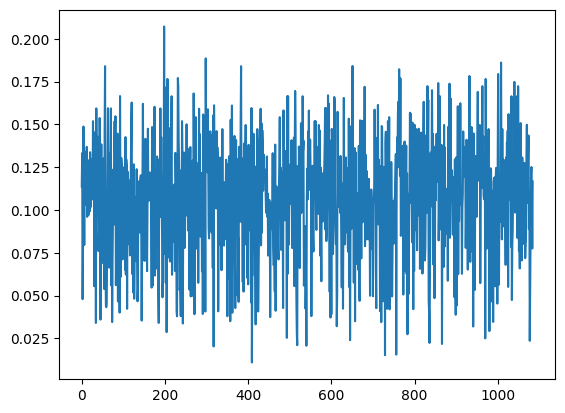

In [26]:
plt.plot(1/(1 + np.exp(-reg.fittedvalues)))

 Use `.fittedvalues` to overlay the line of best fit using `plt.plot`

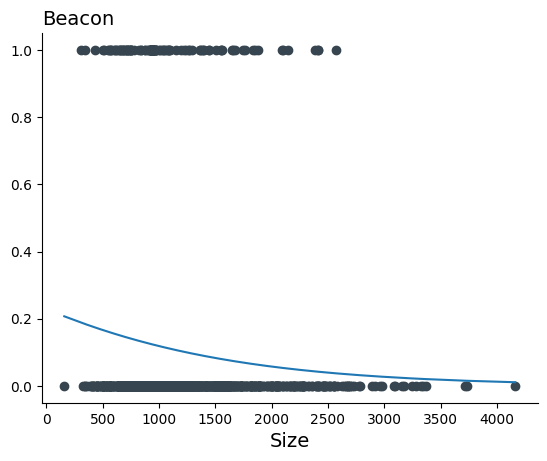

In [27]:
yhat =  1 / (1 + np.exp(-reg.fittedvalues))
df['yhat'] = yhat
df_sorted = df.sort_values(by='size')

plt.scatter(df_sorted['size'], df_sorted['beacon'], color="#36454F")

plt.plot(df_sorted['size'],df_sorted['yhat'])
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('Size', size=14)
plt.title('Beacon', loc='left', size=14)
plt.show()